<a href="https://colab.research.google.com/github/poorvis885/PureCheck/blob/main/Minor_Project_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data Head:


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


--------------------------------------------------
Class Distribution in 'Adulterated' column:
Adulterated
1    469
3    340
0    249
2      1
Name: count, dtype: int64
--------------------------------------------------
Model Evaluation:
Model Accuracy: 0.9952830188679245
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.99      1.00      1.00       100
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        60

    accuracy                           1.00       212
   macro avg       0.75      0.75      0.75       212
weighted avg       0.99      1.00      0.99       212

--------------------------------------------------


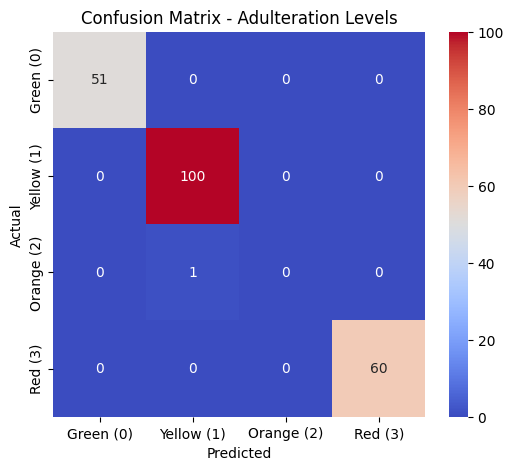

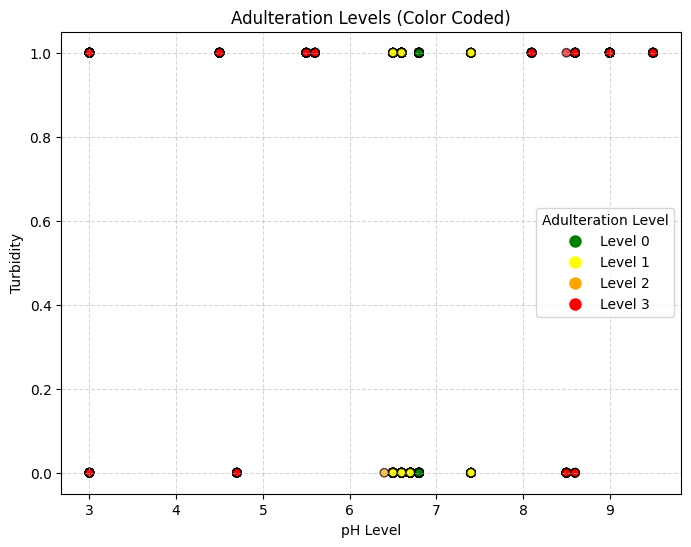

--------------------------------------------------


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install pyserial  # Uncomment this if you need to install it
# import serial         # Uncomment this if you need to use the serial port

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (Replace '/content/milknew.csv' with the actual path if running locally)
try:
    df = pd.read_csv('/content/milknew.csv')
except FileNotFoundError:
    print("Error: The file 'milknew.csv' was not found. Please ensure the path is correct.")
    # Create a dummy DataFrame for demonstration if the file is missing (comment out in real scenario)
    data = {'pH': [6.6, 6.7, 8.5, 9.5, 6.8, 7.0, 5.8, 8.2],
            'Turbidity': [35, 36, 70, 34, 45, 65, 85, 90],
            'Grade': ['high', 'high', 'low', 'low', 'medium', 'medium', 'low', 'low']}
    df = pd.DataFrame(data)

# Display first few rows
print("Original Data Head:")
display(df.head())
print("-" * 50)

# Check for missing values and drop them
df.dropna(inplace=True)

# Add 'Adulterated' column based on pH and Turbidity thresholds
def classify_adulteration(row):
    # Highly Adulterated (Red)
    if row['pH'] < 6.0 or row['pH'] > 8.0 or row['Turbidity'] > 80:
        return 3
    # Moderately Adulterated (Orange)
    elif row['pH'] < 6.5 or row['pH'] > 7.5 or row['Turbidity'] > 60:
        return 2
    # Slightly Adulterated (Yellow)
    elif row['pH'] < 6.8 or row['pH'] > 7.2 or row['Turbidity'] > 50:
        return 1
    # Not Adulterated (Green)
    else:
        return 0

df['Adulterated'] = df.apply(classify_adulteration, axis=1)

# Check class distribution to confirm the original error cause
print("Class Distribution in 'Adulterated' column:")
print(df['Adulterated'].value_counts())
print("-" * 50)

# Features & Target Selection
X = df[['pH', 'Turbidity']]
y = df['Adulterated']

# Split data into train and test
# FIX: Removed 'stratify=y' to resolve the ValueError.
# The error occurred because one of the classes likely had only 1 sample.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
print("Model Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0)) # Added zero_division=0 to handle potential zero precision/recall
print("-" * 50)

# Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
labels = ['Green (0)', 'Yellow (1)', 'Orange (2)', 'Red (3)']
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Adulteration Levels')
plt.show()

# Scatter plot with color coding
plt.figure(figsize=(8,6))
colors = {0: 'green', 1: 'yellow', 2: 'orange', 3: 'red'}
scatter = plt.scatter(df['pH'], df['Turbidity'], c=df['Adulterated'].map(colors), alpha=0.7, edgecolors='k')
plt.xlabel('pH Level')
plt.ylabel('Turbidity')
plt.title('Adulteration Levels (Color Coded)')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[l], markersize=10) for l in colors]
plt.legend(handles, [f'Level {l}' for l in colors], title='Adulteration Level')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print("-" * 50)

# ----------------------------------------------------------------------
# REAL-TIME SENSOR DATA PREDICTION (Commented out for notebook execution)
# ----------------------------------------------------------------------

# print("Real-time simulation part is commented out as it requires a physical Arduino connection.")
# print("Uncomment the 'serial' imports and the following code block to use it.")

# # ser = serial.Serial('/dev/ttyUSB0', 9600)  # Update with your port (e.g., 'COM3' on Windows)

# # def get_sensor_data():
# #     # Make sure your Arduino is sending data in the format "pH,Turbidity\n"
# #     try:
# #         line = ser.readline().decode().strip()
# #         values = line.split(',')
# #         if len(values) == 2:
# #             pH_value = float(values[0])
# #             turbidity_value = float(values[1])
# #             return pH_value, turbidity_value
# #     except Exception as e:
# #         # print(f"Error reading serial data: {e}")
# #         pass # Suppress error for continuous reading
# #     return None, None

# # print("Monitoring real-time sensor data. Press Ctrl+C to stop.")
# # try:
# #     while True:
# #         pH, turbidity = get_sensor_data()
# #         if pH is not None and turbidity is not None:
# #             # Scale the input data using the *fitted* scaler
# #             input_data = scaler.transform([[pH, turbidity]])
# #             prediction = model.predict(input_data)[0]
# #             color_map = {0: 'Green', 1: 'Yellow', 2: 'Orange', 3: 'Red'}
# #             print(f"pH: {pH:.2f}, Turbidity: {turbidity:.2f}, Adulteration Level: {color_map[prediction]}")
# # except KeyboardInterrupt:
# #     print("\nMonitoring stopped by user.")
# # finally:
# #     # if 'ser' in locals() and ser.is_open:
# #     #     ser.close()
# #     #     print("Serial connection closed.")
# #     pass

In [5]:
!pip install plotly
import plotly.express as px

In [6]:
# Assuming your DataFrame 'df' and 'colors' map are defined.
# Map Adulterated level (0, 1, 2, 3) to a text label for better hover data
color_map_names = {0: 'Green (Not Adulterated)', 1: 'Yellow (Slightly)', 2: 'Orange (Moderately)', 3: 'Red (Highly)'}
df['Adulteration_Label'] = df['Adulterated'].map(color_map_names)

fig = px.scatter(df,
                 x='pH',
                 y='Turbidity',
                 color='Adulteration_Label', # Use the label for coloring
                 symbol='Adulteration_Label', # Use a symbol for better distinction
                 title='Interactive Adulteration Levels by pH and Turbidity',
                 hover_data=['Adulterated', 'Adulteration_Label']) # Show these on hover

fig.update_layout(title_x=0.5) # Center the title
fig.show()

In [7]:
class_counts = df['Adulteration_Label'].value_counts().reset_index()
class_counts.columns = ['Adulteration Level', 'Count']

fig_bar = px.bar(class_counts,
                  x='Adulteration Level',
                  y='Count',
                  color='Adulteration Level',
                  title='Distribution of Custom Adulteration Levels',
                  text='Count')

fig_bar.update_traces(textposition='outside')
fig_bar.show()

In [8]:
# Assuming cm (Confusion Matrix) is calculated and labels are defined
cm = confusion_matrix(y_test, y_pred)
labels = ['Green (0)', 'Yellow (1)', 'Orange (2)', 'Red (3)']

fig_cm = px.imshow(cm,
                   text_auto=True,
                   color_continuous_scale='Inferno',
                   x=labels,
                   y=labels,
                   labels=dict(x="Predicted Class", y="Actual Class", color="Count"),
                   title="Interactive Confusion Matrix")

fig_cm.update_layout(title_x=0.5)
fig_cm.show()

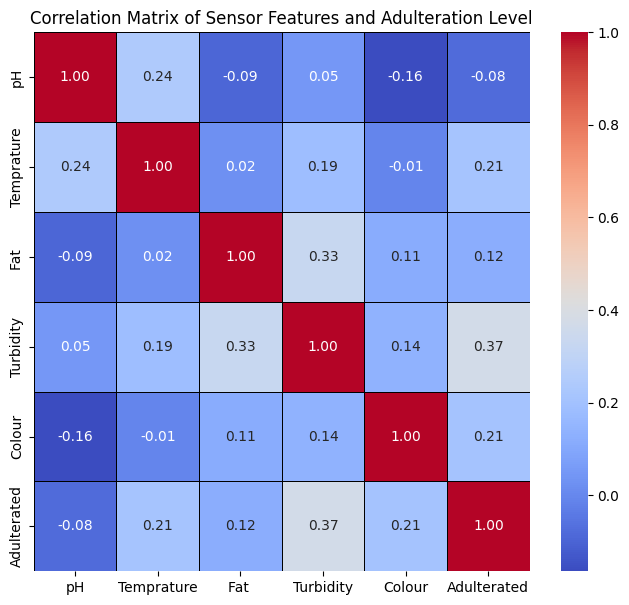

In [11]:
# The relevant continuous sensor-like features from your index are used.
sensor_features = ['pH', 'Temprature', 'Fat ', 'Turbidity', 'Colour', 'Adulterated']

plt.figure(figsize=(8, 7))
# Note: 'Fat ' must include the space as it exists in your column index.
sns.heatmap(df[sensor_features].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            linecolor='black')
plt.title('Correlation Matrix of Sensor Features and Adulteration Level')
plt.show()